## Вторая функция

$$y' = -25y + \cos(t) + 25\sin(t), y(0) = 1, t \in [0, 2]$$

In [ ]:
import math
def fun(t, y):
    return -25 * y + math.cos(t) + 25 * math.sin(t)

In [26]:
def Eiler1(count, h, t, y):
    for i in range(count):
        y[i + 1] = y[i] + h * fun(t[i], y[i])
    return y

In [27]:
def EilerN1(count, h, t, y):
    # для сравнения (k + 1) - ого и (k) - того
    eps = 1e-7
    for i in range(count):
        k = 0
        y[i + 1][0] = y[i] + h * fun(t[i], y[i])   # (0) - начальный прогноз
        y[i + 1].append(y[i] + h * fun(t[i + 1], y[i + 1][k]))   # (1)

        while abs(y[i + 1][k + 1] - y[i + 1][k]) > eps:
            k += 1
            y[i + 1].append(y[i] + h * fun(t[i + 1], y[i + 1][k]))   # (k + 1) - ый
        y[i + 1] = y[i + 1][k]   # сохраняем в i + 1 позицию лучший результат - (k) - тый
    return y

In [28]:
def Eiler2(count, h, t, y):
    for i in range(count):
        y[i + 1] = y[i] + h / 2 * (fun(t[i], y[i]) + fun(t[i + 1], y[i] + h * fun(t[i], y[i])))
    return y

In [29]:
def Trap(count, h, t, y):
    # для сравнения (k + 1) - ого и (k) - того
    eps = 1e-7
    for i in range(count):
        k = 0
        y[i + 1][0] = y[i] + h * fun(t[i], y[i])  # (0) - начальный прогноз
        y[i + 1].append(y[i] + h / 2 * (fun(t[i], y[i]) + fun(t[i + 1], y[i + 1][k])))  # (1)

        while abs(y[i + 1][k + 1] - y[i + 1][k]) > eps:
            k += 1
            y[i + 1].append(y[i] + h / 2 * (fun(t[i], y[i]) + fun(t[i + 1], y[i + 1][k])))  # (k + 1) - ый
        y[i + 1] = y[i + 1][k]  # сохраняем в i + 1 лучший результат - (k) - тый
    return y

In [30]:
def Runge_Kutt4(t, y, h, count):
    k = [0] * 4
    for i in range(count):
        k[0] = fun(t[i], y[i])
        k[1] = fun(t[i] + h / 2, y[i] + h * k[0] / 2)
        k[2] = fun(t[i] + h / 2, y[i] + h * k[1] / 2)
        k[3] = fun(t[i] + h, y[i] + h * k[2])
        kn = (k[0] + 2 * k[1] + 2 * k[2] + k[3]) / 6
        y[i + 1] = y[i] + h * kn
    return y

In [31]:
t_max = 2
t_min = 0
h1 = 0.1
h2 = 0.05
h3 = 0.025
h1, h2, h3

(0.1, 0.05, 0.025)

In [32]:
count1 = t_max / h1
count1 = int(count1)
count2 = t_max / h2
count2 = int(count2)
count3 = t_max / h3
count3 = int(count3)
y1 = [1] + [0] * count1
y2 = [1] + [0] * count2
y3 = [1] + [0] * count3
t1 = [2 * i / count1 for i in range(count1 + 1)]
t2 = [2 * i / count2 for i in range(count2 + 1)]
t3 = [2 * i / count3 for i in range(count3 + 1)]
count1, count2, count3

(20, 40, 80)

In [33]:
y1 = Eiler1(count1, h1, t1, y1)
y2 = Eiler1(count2, h2, t2, y2)
y3 = Eiler1(count3, h3, t3, y3)

In [34]:
y3 = [[0] for i in range(count3 + 1)]
y3[0] = 1

In [35]:
#y1, y2 - не в эпсилон полоске
y3 = EilerN1(count3, h3, t3, y3)

In [36]:
t_max = 2
t_min = 0
h1 = 0.2
h2 = 0.1
h3 = 0.05
h1, h2, h3

(0.2, 0.1, 0.05)

In [37]:
count1 = t_max / h1
count1 = int(count1)
count2 = t_max / h2
count2 = int(count2)
count3 = t_max / h3
count3 = int(count3)
y1 = [1] + [0] * count1
y2 = [1] + [0] * count2
y3 = [1] + [0] * count3
t1 = [2 * i / count1 for i in range(count1 + 1)]
t2 = [2 * i / count2 for i in range(count2 + 1)]
t3 = [2 * i / count3 for i in range(count3 + 1)]
count1, count2, count3

(10, 20, 40)

In [38]:
y1 = Eiler2(count1, h1, t1, y1)
y2 = Eiler2(count2, h2, t2, y2)
y3 = Eiler2(count3, h3, t3, y3)

In [ ]:
#y1, y2 - не в эпсилон полоске
y3 = [[0] for i in range(count3 + 1)]
y3[0] = 1
y3 = Trap(count3, h3, t3, y3)

In [43]:
t_max = 2
t_min = 0
h1 = 0.5   # 0.1
h2 = 0.25
h3 = 0.125
count1 = t_max / h1
count1 = int(count1)
count2 = t_max / h2
count2 = int(count2)
count3 = t_max / h3
count3 = int(count3)
y1 = [1] + [0] * count1
y2 = [1] + [0] * count2
y3 = [1] + [0] * count3
t1 = [2 * i / count1 for i in range(count1 + 1)]
t2 = [2 * i / count2 for i in range(count2 + 1)]
t3 = [2 * i / count3 for i in range(count3 + 1)]
count1, count2, count3

(4, 8, 16)

In [44]:
y1 = Runge_Kutt4(t1, y1, h1, count1)
y2 = Runge_Kutt4(t2, y2, h2, count2)
y3 = Runge_Kutt4(t3, y3, h3, count3)

In [18]:
import numpy as np
def function(t):
    return np.e ** (-25 * t) + math.sin(t)

In [19]:
# истинные значения функции
a1 = [function(i) for i in t1]
a2 = [function(i) for i in t2]
a3 = [function(i) for i in t3]

In [20]:
# абсолютная погрешность между практическим и теоретическим для каждой сетки
b1 = list(abs(np.array(y1) - np.array(a1)))
b2 = list(abs(np.array(y2) - np.array(a2)))
b3 = list(abs(np.array(y3) - np.array(a3)))

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

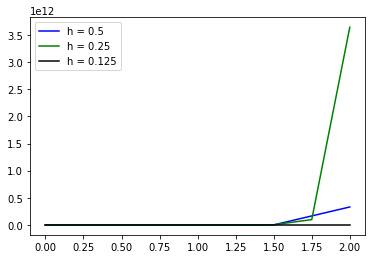

In [31]:
plt.subplots()
plt.plot(t1, b1, label='h = 0.5', color='blue')
plt.plot(t2, b2, label='h = 0.25', color='green')
plt.plot(t3, b3, label='h = 0.125', color='black')
plt.legend()

In [28]:
b2[count2] / b3[count3]

1266539933.553171

In [29]:
b1[count1] / b2[count2]

0.09074901142256965

In [30]:
function(2)

0.9092974268256817